In [1]:
import random
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
num_Jobs = 10
num_machines = 3
processing_times = pd.DataFrame(np.random.randint(1, 20, size = (num_Jobs, num_machines)),
                                        columns = [f'Machine{i}' for i in range(num_machines)],
                                        index = [f'{i}' for i in range(num_Jobs)])
availability_data = {
    'Machine': [f'{i}' for i in range(num_machines)],
    'Availability': [80, 85, 75]  
}
machine_availability = pd.DataFrame(availability_data).set_index('Machine')

In [3]:
processing_times #Dataset

,Machine0,Machine1,Machine2
0,7,15,11
1,8,7,19
2,11,11,4
3,8,3,2
4,12,6,2
5,1,12,12
6,17,10,16
7,15,15,19
8,12,3,5
9,19,7,9


In [4]:
machine_availability


,Availability
Machine,
0,80
1,85
2,75


In [5]:
def calculate_completion_time(solution, processing_times, machine_availability):
    num_jobs, num_machines = processing_times.shape
    machine_times = np.zeros(num_machines)

    for job, machine in enumerate(solution):
        # Corrected indexing using .iloc
        machine_times[machine] += processing_times.iloc[job, machine]

        # Check machine availability constraint for each job
        if machine_times[machine] > machine_availability.iloc[machine, 0]:
            return float('inf')

    return max(machine_times)


In [6]:
def generate_neighbor(solution, machine_availability, processing_times):
    neighbor = solution.copy()
    job_to_move = random.randint(0, len(solution) - 1)
    new_machine = random.randint(0, max(solution))
    
    
    while neighbor[job_to_move] == new_machine or \
            machine_availability.iloc[new_machine, 0] < processing_times.iloc[job_to_move, new_machine]:
        new_machine = random.randint(0, max(solution))
        
    neighbor[job_to_move] = new_machine
    return neighbor


In [7]:
def stimulated_annealing(initial_solution, processing_times, temperature, cooling_rate):
    iterations = []
    current_energy_array = []
    
    current_solution = initial_solution
    current_energy = calculate_completion_time(current_solution, processing_times, machine_availability)
    iterations.append(0)
    current_energy_array.append(current_energy)
    
    
    iteration = 1
    while temperature > 1:
        neighbor_solution = generate_neighbor(current_solution, machine_availability, processing_times)
        neighbor_energy = calculate_completion_time(neighbor_solution, processing_times,  machine_availability)
        if (neighbor_energy < current_energy) or (random.uniform(0, 1) < math.exp((current_energy - neighbor_energy) / temperature)):
            current_solution = neighbor_solution
            current_energy = neighbor_energy
            iterations.append(iteration)
            current_energy_array.append(current_energy)
            
        
        temperature = temperature * cooling_rate
        iteration += 1
        
    return current_solution, current_energy, current_energy_array, iterations

In [8]:
initial_solution = np.random.randint(0, num_machines, size=num_Jobs)
initial_solution


array([2, 1, 0, 1, 1, 1, 0, 1, 0, 1])

In [9]:
calculate_completion_time(initial_solution, processing_times, machine_availability)

50.0

In [10]:
initial_temperature = 1000.0
cooling_rate = 0.75

In [11]:
best_solution, best_completion_time, energy_array, iterations =  stimulated_annealing(initial_solution, processing_times, initial_temperature, cooling_rate)
print("\nBest Solution: ", best_solution)
print("\nBest Completion Time: ",best_completion_time)
print("\nInitial Solution:", initial_solution)
print("Initial Completion Time:", calculate_completion_time(initial_solution, processing_times, machine_availability))



Best Solution:  [0 2 0 1 0 1 1 1 0 2]

Best Completion Time:  42.0

Initial Solution: [2 1 0 1 1 1 0 1 0 1]
Initial Completion Time: 50.0


In [12]:
def calculate_completion_time1(solution, processing_times, machine_availability):
    num_jobs, num_machines = processing_times.shape
    machine_times = np.zeros(num_machines)

    for job, machine in enumerate(solution):
        # Corrected indexing using .iloc
        machine_times[machine] += processing_times.iloc[job, machine]

        # Check machine availability constraint for each job
        if machine_times[machine] > machine_availability.iloc[machine, 0]:
            machine_times

    return machine_times

In [13]:
calculate_completion_time1(best_solution, processing_times, machine_availability)

array([42., 40., 28.])

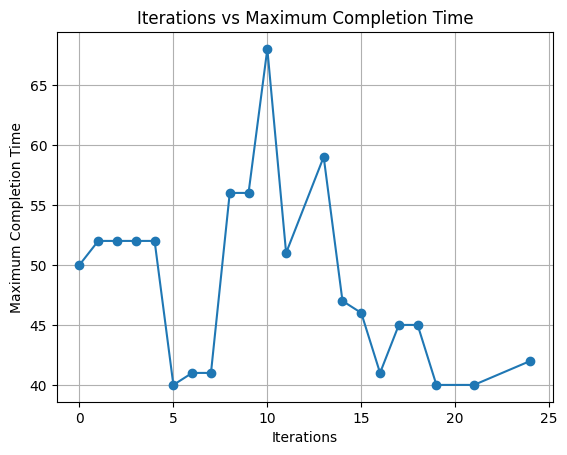

In [14]:
plt.plot(iterations, energy_array, marker='o', linestyle='-')
plt.title('Iterations vs Maximum Completion Time')
plt.xlabel('Iterations')
plt.ylabel('Maximum Completion Time')
plt.grid(True)
plt.show()

In [15]:
len(iterations)

21

In [16]:
len(energy_array)

21